In [1]:
using CSV, DataFrames, Plots, LinearAlgebra, Convex, SCS

##  1.  Which conditions should meet matrices 𝐴 and 𝑏 to be solvable from the least squares perspective?

Sabemos que la solución al problema de minimos cuadrados es a su vez la solucion de las ecuaciónes normales de la forma $A^TAx=A^Tb$, dado que la solución exacta a esta ecuación es $x=(A^TA)^{-1}A^T$ entonces el problema de minimos cuadrados solo puede resolverse si la matriz $A^TA$ es invertible.

Veamos entonces que basta con que los vectores columna de la matriz $A\in M_{n\times m}$ sean linealmente independientes, en otras palabras que la dimensión del espacio lineal de la imagen de la transformación lineal que representa la matriz $A$ sea $m$. Para esto vamos a ver que $A^TAx=0$ tiene una única solución trivial.

Supongamos que la matriz $A$ tiene vectores columna linealmente independientes, si $A^TAx=0$ para algún $x\in \mathbb{R}^m$ al multiplicar $x^T$ a la ecuación tenemos que $$0=x^TA^TAx=(Ax)^T(Ax)$$ Note que lo anterior indica que $\|Ax\|^2=0$ con la norma euclidiana, dado que el vector 0 es el único que cumple esta condicion tenemos que $x$ soluciona la ecuación $Ax=0$, pero por nuestra hipotesis $x=0$ es la única solución. Entonces, $A^TA$ es una matriz invertible

##  2. Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values

En primer lugar tomamos los valores historicos del precio del bitcoin de un año (tomado de https://www.investing.com/).

In [2]:
dataBitcoin = CSV.read("Bitcoin Historical Data - Investing.com.csv",DataFrame);
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

In [3]:
dataBitcoin

,Date,Price,Open,High,Low,Vol.,Change %,PriceFloat
,String15,String15,String15,String15,String15,String7,String7,Float64
1,"Mar 18, 2022",41767.8,"40,914.6","42,308.4","40,234.8",2.31B,2.08%,41767.8
2,"Mar 17, 2022",40914.8,"41,118.7","41,406.0","40,557.8",1.90B,-0.50%,40914.8
3,"Mar 16, 2022",41118.7,"39,282.5","41,701.6","38,953.2",4.47B,4.67%,41118.7
4,"Mar 15, 2022",39285.7,"39,673.0","39,854.7","38,220.9",2.25B,-0.97%,39285.7
5,"Mar 14, 2022",39671.1,"37,789.5","39,914.3","37,613.6",2.33B,4.97%,39671.1
6,"Mar 13, 2022",37792.4,"38,813.2","39,272.3","37,603.4",1.55B,-2.63%,37792.4
7,"Mar 12, 2022",38814.3,"38,730.2","39,355.3","38,666.5",1.11B,0.22%,38814.3
8,"Mar 11, 2022",38730.2,"39,422.5","40,177.0","38,236.4",2.79B,-1.74%,38730.2
9,"Mar 10, 2022",39416.3,"41,933.9","42,029.1","38,603.5",3.62B,-5.99%,39416.3


Para poder observar los valores de mas antiguo a mas reciente invertimos el arreglo de los precios.

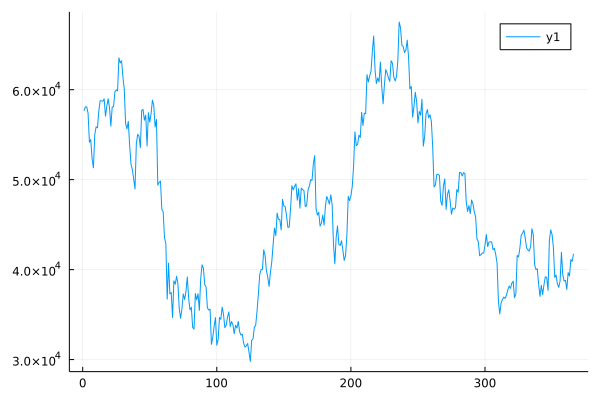

In [4]:
dataBitcoin.PriceFloat=reverse(dataBitcoin.PriceFloat)
plot(dataBitcoin.PriceFloat)

Podemos generalizar el modelo visto en clase para calcular los coeficientes de un polinmio de grado 3 que se ajuste a los datos  que obtenemos de la siguiente manera.

In [5]:
N = size(dataBitcoin.PriceFloat,1);
A = Array((1:N));
b = Array(dataBitcoin.PriceFloat);
A = [ones(N,1) A A.^2 A.^3];

In [6]:
x=A\b

4-element Vector{Float64}:
 65559.97083505602
  -563.7653132684674
     3.7981771448621653
    -0.006940116639999928

Podemos ver que esta solución tiene un error grande en los extremos

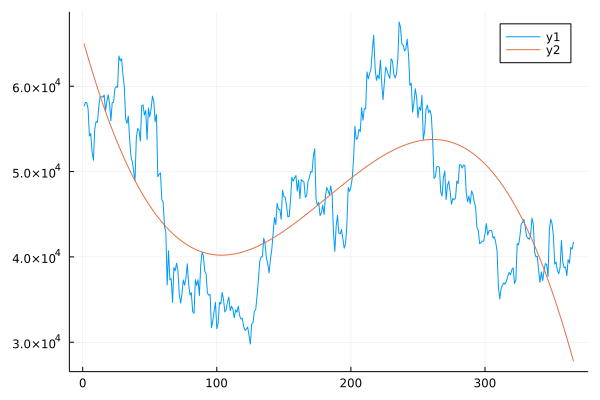

In [7]:
pred = A*x
plot(A[:,2],b)
plot!(A[:,2],pred)

Entonces construimos una función que extienda este modelo a polinomios de grado $n$.

In [8]:

function matrixA(i,f,n)
    column = Array((i:f));
    A = zeros((f-i+1,n+1));
    for j=0:n
        A[:,j+1]=column.^j
    end
    return A
end

function polynomialModel(n,Prices)
    N = size(Prices,1);
    A = matrixA(1,N,n)
    b = Prices;
    x = A\b;
    return A,x
end

polynomialModel (generic function with 1 method)

Vemos que al aumentar el grado parece comportarse mejor

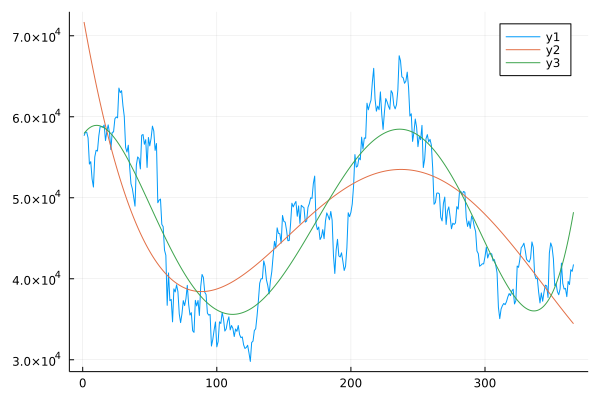

In [9]:
A4,x4=polynomialModel(4,dataBitcoin.PriceFloat)
A5,x5=polynomialModel(5,dataBitcoin.PriceFloat)
real=dataBitcoin.PriceFloat
plot(Array((1:N)),real)
plot!(Array((1:N)),(A4*x4))
plot!(Array((1:N)),(A5*x5))

Sin embargo, a partir de grado 6 el polinomio se aleja bastante en los primeros valores, además para grados muy altos el polinomio oscila demasiado

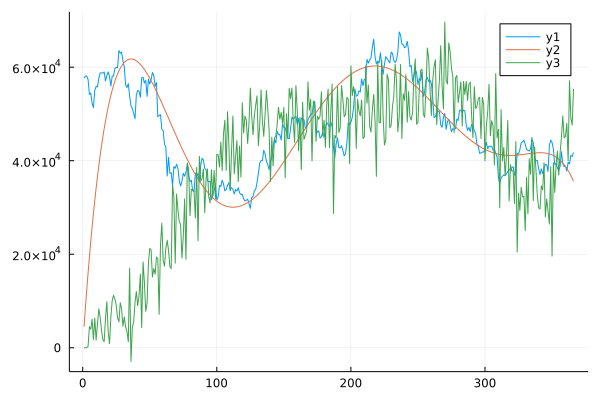

In [10]:
A6,x6=polynomialModel(6,dataBitcoin.PriceFloat);
A30,x30=polynomialModel(30,dataBitcoin.PriceFloat);
plot(Array((1:N)),real);
plot!(Array((1:N)),A6*x6);
plot!(Array((1:N)),A30*x30)

Comparamos con los datos de la última semana

In [11]:
data7 = CSV.read("Bitcoin7Days.csv",DataFrame);
data7.Price .= replace.(data7.Price, "," => "");
data7.PriceFloat = parse.(Float64, data7.Price);

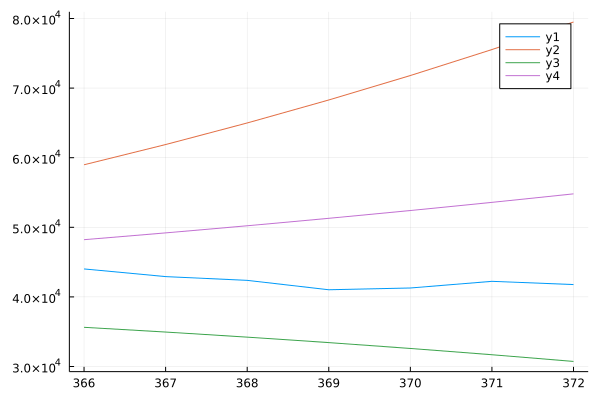

In [12]:
A5,x5=polynomialModel(5,dataBitcoin.PriceFloat);
A6,x6=polynomialModel(6,dataBitcoin.PriceFloat)
A7,x7=polynomialModel(7,dataBitcoin.PriceFloat)
real=data7.PriceFloat

plot(Array((N:N+6)),real)
A7 = matrixA(N,N+6,7)
plot!(Array((N:N+6)),A7*x7)
A6 = matrixA(N,N+6,6)
plot!(Array((N:N+6)),A6*x6)
A5 = matrixA(N,N+6,5)
plot!(Array((N:N+6)),A5*x5)


##  3.  Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold, during the last year.

Cargamos los datos de las 3 mercancias

In [21]:
dataBitcoin.PriceFloat=reverse(dataBitcoin.PriceFloat)#Volvemos a invertir los datos de bitcoin

dataOil = CSV.read("Crude Oil WTI Futures Historical Data.csv",DataFrame);
dataOil.PriceFloat= dataOil.Price

dataGold = CSV.read("Gold Futures Historical Data.csv",DataFrame);
dataGold.Price .= replace.(dataGold.Price, "," => "");#Solo es necesario en el oro, pues tiene valores de miles
dataGold.PriceFloat = parse.(Float64, dataGold.Price);

dataSilver = CSV.read("Silver Futures Historical Data.csv",DataFrame);
dataSilver.PriceFloat= dataSilver.Price;

Debemos intersecar las fechas de todas las fechas, no todos los días coinciden.

In [22]:
Days=intersect(dataGold.Date,dataOil.Date,dataSilver.Date,dataBitcoin.Date)

#Reducimos los datos para que tengan sentidoo
dataBitcoin=dataBitcoin[in(Days).(dataBitcoin.Date),:]
dataOil=dataOil[in(Days).(dataOil.Date),:]
dataSilver=dataSilver[in(Days).(dataSilver.Date),:]
dataGold=dataGold[in(Days).(dataGold.Date),:]

,Date,Price,Open,High,Low,Vol.,Change %,PriceFloat
,String15,String15,String15,String15,String15,String7,String7,Float64
1,"Mar 18, 2022",1929.30,"1,943.90","1,946.20","1,918.00",150.88K,-0.72%,1929.3
2,"Mar 17, 2022",1943.20,"1,928.40","1,951.00","1,924.00",149.83K,1.78%,1943.2
3,"Mar 16, 2022",1909.20,"1,920.10","1,930.10","1,895.20",195.46K,-1.06%,1909.2
4,"Mar 15, 2022",1929.70,"1,953.70","1,956.90","1,908.10",220.37K,-1.59%,1929.7
5,"Mar 14, 2022",1960.80,"1,988.70","1,994.80","1,952.00",162.20K,-1.22%,1960.8
6,"Mar 11, 2022",1985.00,"2,000.30","2,004.00","1,960.60",262.09K,-0.77%,1985.0
7,"Mar 10, 2022",2000.40,"1,992.80","2,015.10","1,975.00",303.27K,0.61%,2000.4
8,"Mar 09, 2022",1988.20,"2,060.20","2,068.50","1,981.00",360.35K,-2.70%,1988.2
9,"Mar 08, 2022",2043.30,"2,001.00","2,078.80","1,985.80",447.65K,2.37%,2043.3


Implementamos el modelo lineal, esta vez tomando las cuatro variables

In [23]:
N = size(dataBitcoin.PriceFloat,1);

A=[
    ones(N,1) dataOil.PriceFloat dataSilver.PriceFloat dataGold.PriceFloat
]

b=dataBitcoin.PriceFloat;

El valor independiente no representa mas que un desplazamiento de los valores, por otro lado, podemos interpretar los demas valores como el "aporte" de cada materia prima si hay un incremento de un dolar

In [24]:
x=A\b

4-element Vector{Float64}:
 161730.86051515568
      0.046462629525400576
   -293.279241006077
    -59.25490231066423

Hacemos una pequeña prueba con el precio al 25 de marzo

In [26]:
aprox=x[1]+x[2]*111.75+x[3]*25.955+x[4]*1962.40
print("El valor del Bitcoin es de 44081 y el valor de la predicción es de ", aprox)

El valor del Bitcoin es de 44081 y el valor de la predicción es de 37842.16971924492